In [1]:
# Paul-Jason Mello
# Prof Shim
# CMPE 257
# March 20th, 2022
# Lab 1

In [2]:
#Kaggle Competition Website: https://www.kaggle.com/c/cmpe-257-lab-1-spring-2022/overview

# Kaggle Competition

In [3]:
# Data Description: 
# The dataset contains information about people’s jobs such as their demographic information etc. 
# and the target variable is to predict whether the person is looking for a job change or not, the 
# dataset is imbalanced. There are 14,368 rows in the training set and 4790 rows in the testing set. 

In [4]:
# The columns in the dataset are as follows:
# index:                    Unique ID for candidate
# city:                     City code
# city development index:   Development index of the city (scaled)
# gender:                   Gender of candidate
# relevent experience:      Relevant experience of candidate
# enrolled university:      Type of University course enrolled if any
# education level:          Education level of candidate
# major discipline:         Education major discipline of candidate
# experience:               Candidate total experience in years
# company_size:             No of employees in current employer's company
# company_type:             Type of current employer
# last_new_job:             Difference in years between previous job and current job
# training_hours:           training hours completed
# target:                   0 – Not looking for job change     1 – Looking for a job change

In [5]:
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import sklearn as sk
import random
import scipy.stats as stats 
import matplotlib.pyplot as pyplt
import statsmodels.api as smS

# Various Libraries Needed
from imblearn.over_sampling import SMOTE
from scipy.special import expit
from scipy.stats import chi2_contingency, chisquare

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, RFECV
from sklearn.tree import DecisionTreeRegressor

# NN Model
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set(rc={"figure.figsize":(15, 15)})

In [6]:
X_test = pd.read_csv("x_test.csv")
X_train = pd.read_csv("x_train.csv")
Y_train = pd.read_csv("y_train.csv")

In [7]:
print(X_train.index.max())

14367


In [8]:
X_test

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16834,city_104,0.924,Male,Has relevent experience,no_enrollment,Primary School,NaN,15,100-500,Pvt Ltd,2,58
1,15437,city_114,0.926,Male,No relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,>4,308
2,8549,city_83,0.923,Male,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,8
3,7222,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,6,NaN,NaN,never,85
4,17054,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,7,500-999,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,5915,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,2,17
4786,11083,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,100-500,Pvt Ltd,>4,77
4787,2335,city_103,0.920,NaN,Has relevent experience,NaN,Graduate,Humanities,>20,NaN,NaN,1,258
4788,7691,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,6,50-99,Pvt Ltd,1,95


In [9]:
X_train

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,157
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,NaN,34
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4


In [10]:
Y_train

,index,target
0,17007,0.0
1,631,1.0
2,669,0.0
3,8949,0.0
4,2341,0.0
...,...,...
14363,16304,0.0
14364,79,0.0
14365,12119,0.0
14366,14147,0.0


In [11]:
# Remaking complete dataset

x_target = pd.merge(X_train, Y_train, on = "index", how = "inner")
x_target

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4,0.0
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,NaN,34,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4,0.0


# 2. Explain in your own words what is NOIR classification of data. 
(2 points)

In [12]:
# 2. Explain in your own words what is NOIR classification of data. 
# (2 points)

# NOIR classification is an acronym for Nominal, Ordinal, Interval, and Ratio.
# Each letter refers to a class of data points.

# Nominal:
# This refers to observations that consist of being a label. E.x. Bridge, School, Female, 

# Ordinal:
# This refers to variables which are considered to be in a ranking order. E.x. (Your Ranked Favorite Movies)

# Interval
# This refers to observations which are continuous. E.x. (Tempurature: Fahrenheit)

# Ratio
# This refers to observations which are continuous and have an absolute zero. E.x. (Tempurature: Kelvin)

# 3. Classify the given dataset features into NOIR categories. 
(2 points)

In [13]:
# index:                    Nominal
# city:                     Nominal
# city_development_index:   Interval
# gender:                   Nominal
# relevent_experience:      Nominal
# enrolled_university:      Nominal
# education_level:          Ordinal
# major_discipline:         Nominal
# experience:               Ratio
# company_size:             Interval
# company_type:             Nominal
# lastnewjob:               Ordinal
# training_hours:           Ratio
# target:                   Nominal

# 4. Summarize the dataset 
(10 points)

In [14]:
# a. Number of columns and rows present (1 point)
# b. Min, max, avg, std dev etc. stats for continuous features (hint: use pandas describe function) (1 point)
# c. Number of unique values for categorical features (1 point)
# d. Number of nulls and Nans in each column (1 point)
# e. Visualize distribution of each feature using graphs (6 points)

In [15]:
# A: Number of columns and rows present (1 point)

# As mentioned in the data description there are 14,368 rows in the training set and 4790 rows in the 
# testing set. There are a total of 13 unique columns giving us a dimension of 14368 rows × 13 columns.

In [16]:
print("X_train dimensions: " + str(X_train.shape))
print("X_test dimensions: " + str(X_test.shape))
print("Y_train dimensions: " + str(Y_train.shape))
print("x_target dimensions: " + str(x_target.shape))

X_train dimensions: (14368, 13)
X_test dimensions: (4790, 13)
Y_train dimensions: (14368, 2)
x_target dimensions: (14368, 14)


In [17]:
# B: Min, max, avg, std dev etc. stats for continuous features (hint: use pandas describe function) (1 point)

# The continuous variables are city development index, experience, company size, and training hours.

In [18]:
x_target

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22,0.0
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22,1.0
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88,0.0
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91,0.0
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,16304,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,157,0.0
14364,79,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,2,<10,Early Stage Startup,1,4,0.0
14365,12119,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,1,50-99,Pvt Ltd,NaN,34,0.0
14366,14147,city_10,0.895,Male,Has relevent experience,no_enrollment,Masters,STEM,15,100-500,Public Sector,1,4,0.0


In [19]:
x_target.city_development_index.describe()

count    14368.000000
mean         0.828252
std          0.123419
min          0.448000
25%          0.738000
50%          0.899000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [20]:
x_target.experience.describe()

count     14323
unique       22
top         >20
freq       2425
Name: experience, dtype: object

In [21]:
x_target.company_size.describe()

count      9938
unique        8
top       50-99
freq       2301
Name: company_size, dtype: object

In [22]:
x_target.training_hours.describe()

count    14368.000000
mean        65.396645
std         60.277583
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [23]:
# C: Number of unique values for categorical features (1 point)

# We need to drop non-categorical features (ordinal, interval, ratio)

dropCols = [0,2,6,8,9,11,12]

temp = x_target.copy()
temp.drop(temp.columns[dropCols], inplace = True, axis = 1)
temp

,city,gender,relevent_experience,enrolled_university,major_discipline,company_type,target
0,city_61,Male,Has relevent experience,no_enrollment,STEM,NGO,0.0
1,city_94,Male,Has relevent experience,NaN,NaN,NaN,1.0
2,city_114,NaN,Has relevent experience,Full time course,STEM,Pvt Ltd,0.0
3,city_114,Male,No relevent experience,Full time course,STEM,NaN,0.0
4,city_16,NaN,Has relevent experience,no_enrollment,STEM,Pvt Ltd,0.0
...,...,...,...,...,...,...,...
14363,city_103,Male,Has relevent experience,no_enrollment,STEM,NaN,0.0
14364,city_103,Female,Has relevent experience,no_enrollment,STEM,Early Stage Startup,0.0
14365,city_21,Male,Has relevent experience,no_enrollment,STEM,Pvt Ltd,0.0
14366,city_10,Male,Has relevent experience,no_enrollment,STEM,Public Sector,0.0


In [24]:
print(temp.nunique()) # Unique values

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
major_discipline         6
company_type             6
target                   2
dtype: int64


In [25]:
print(Y_train.nunique()) # Unique values

index     14368
target        2
dtype: int64


In [26]:
# D: Number of nulls and Nans in each column (1 point)

In [27]:
x_target.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [28]:
X_test.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    1115
relevent_experience          0
enrolled_university         94
education_level            122
major_discipline           724
experience                  20
company_size              1508
company_type              1542
last_new_job                96
training_hours               0
dtype: int64

In [29]:
X_train.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
dtype: int64

In [30]:
Y_train.isnull().sum()

index     0
target    0
dtype: int64

In [31]:
# E: Visualize distribution of each feature using graphs (6 points)

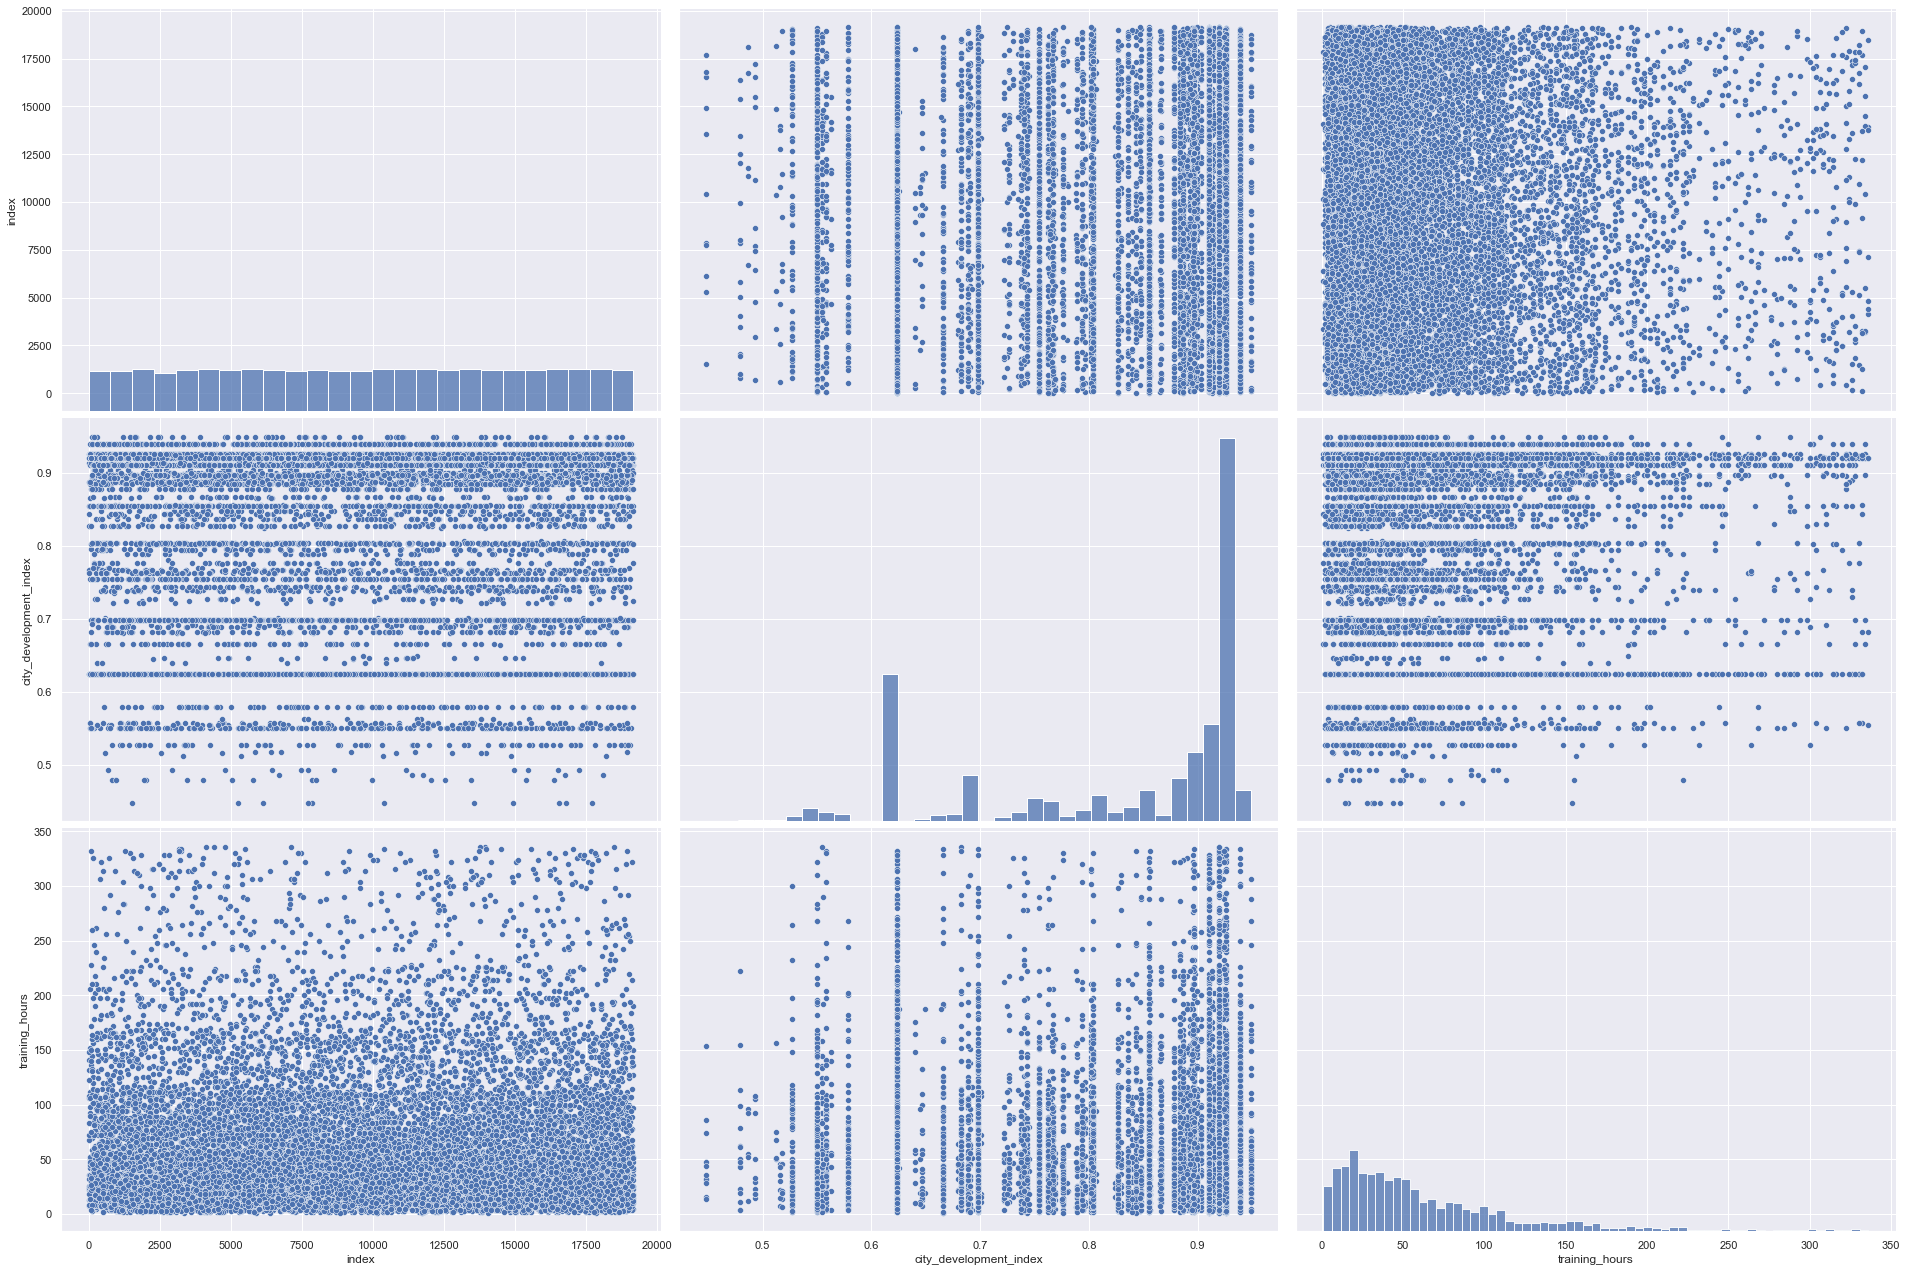

In [32]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.pairplot(X_train, height=6, aspect=1.5)

In [33]:
def distributionPlot(name):
    return sns.displot(x_target, x = name,height=6, aspect=1.5)

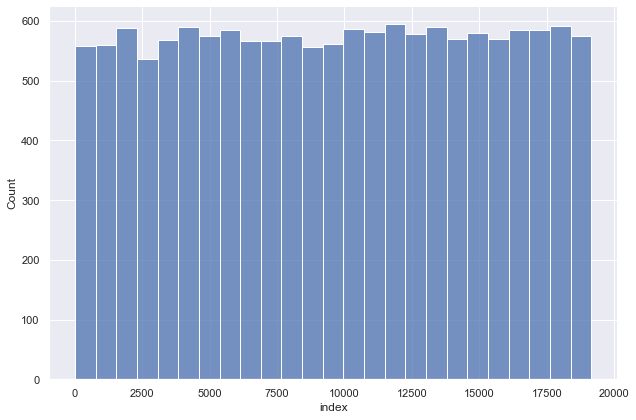

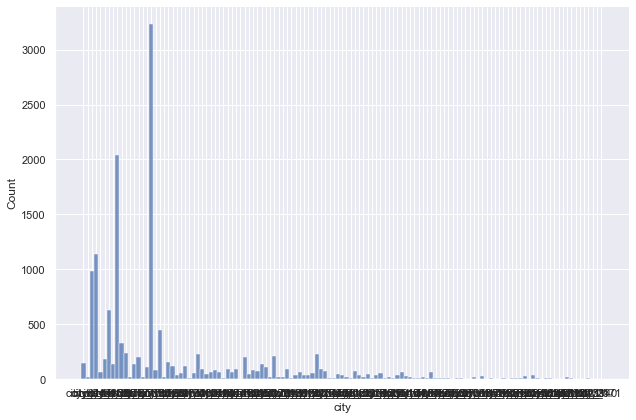

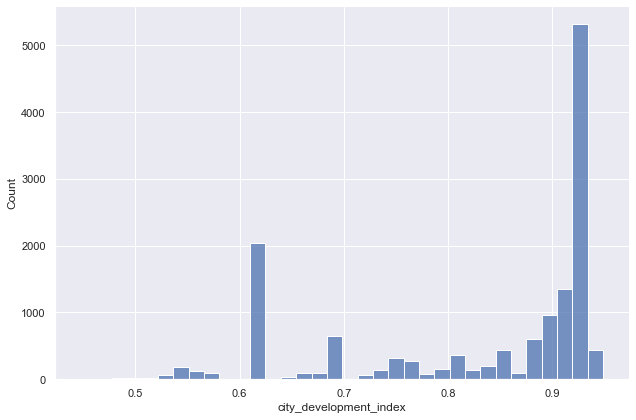

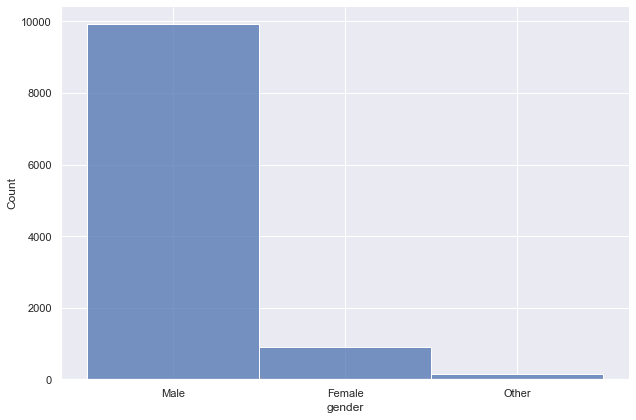

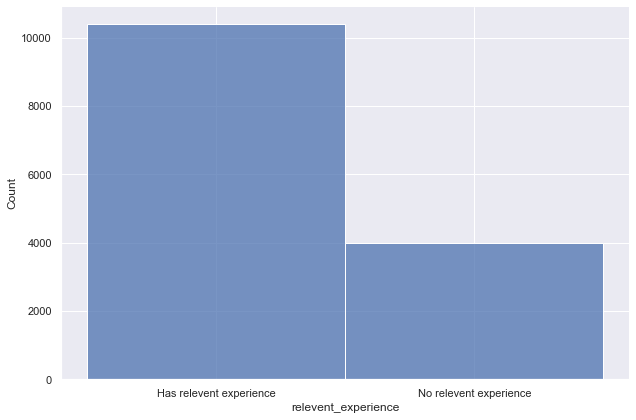

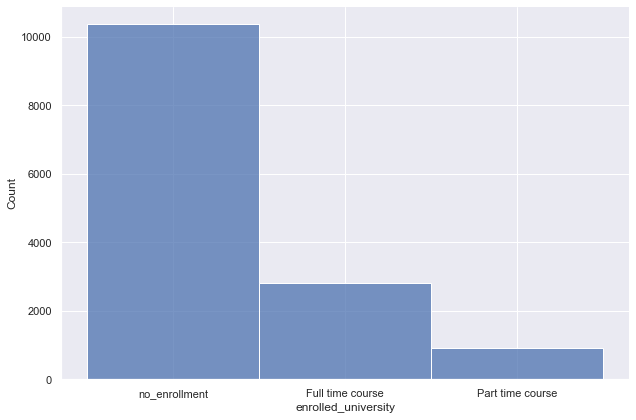

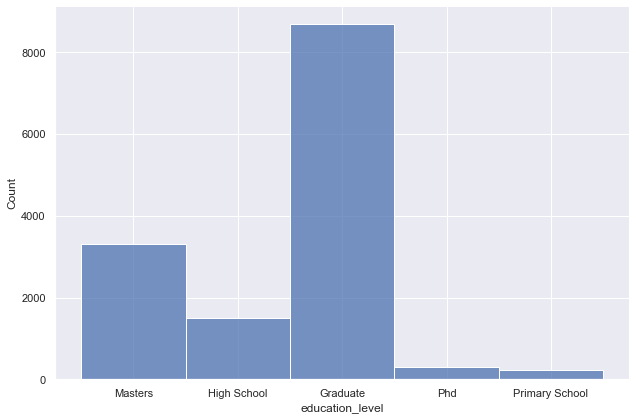

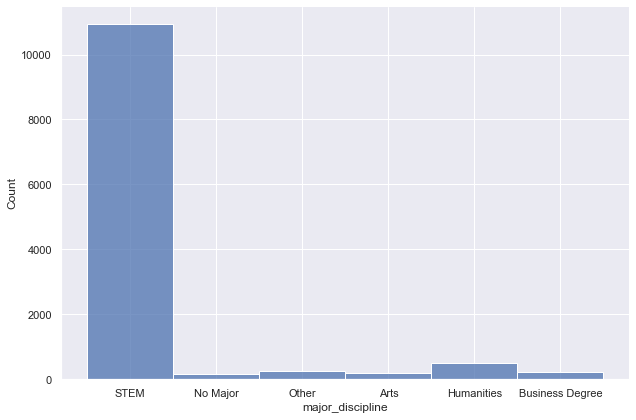

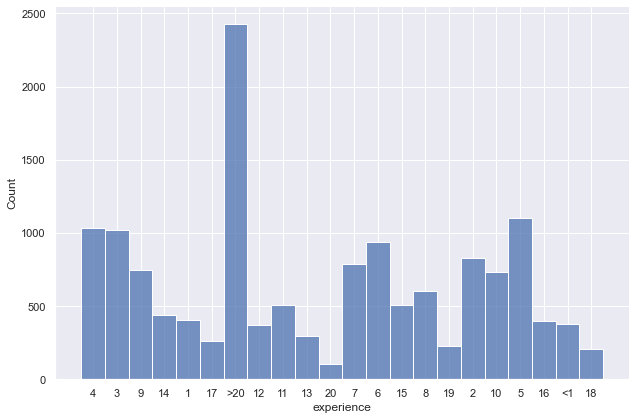

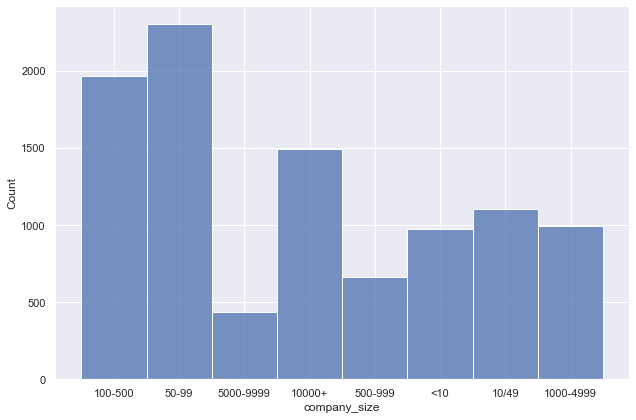

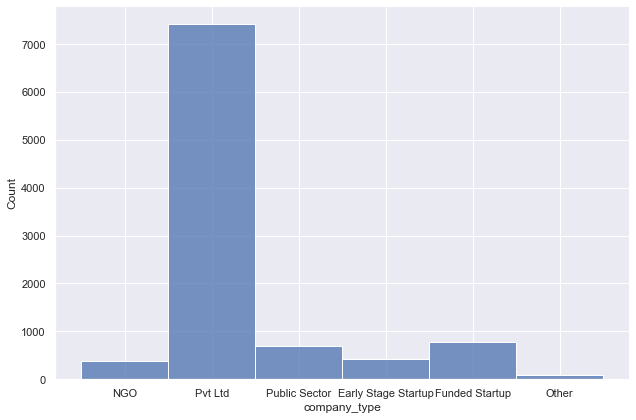

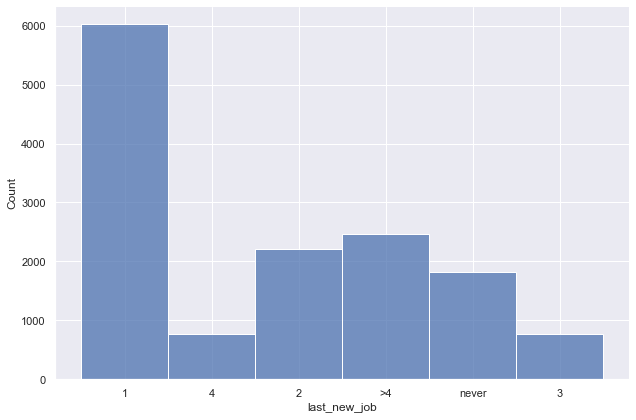

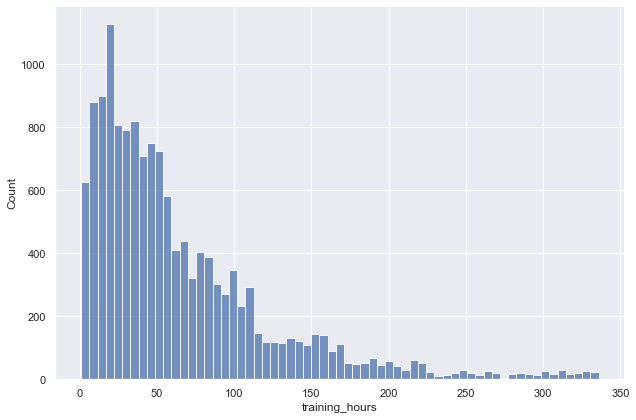

In [34]:
for x in X_train:
    distributionPlot(x_target[x])

# 5. Visualize the relationship of each feature with target variable 
(hint: create density plots for continuous features and cross tables for categorical features) 
(6 points)

In [35]:
# index:                    Nominal
# city:                     Nominal
# city_development_index:   Interval
# gender:                   Nominal
# relevent_experience:      Nominal
# enrolled_university:      Nominal
# education_level:          Ordinal
# major_discipline:         Nominal
# experience:               Ratio
# company_size:             Interval
# company_type:             Nominal
# last_new_job:             Ordinal
# training_hours:           Ratio
# target:                   Nominal

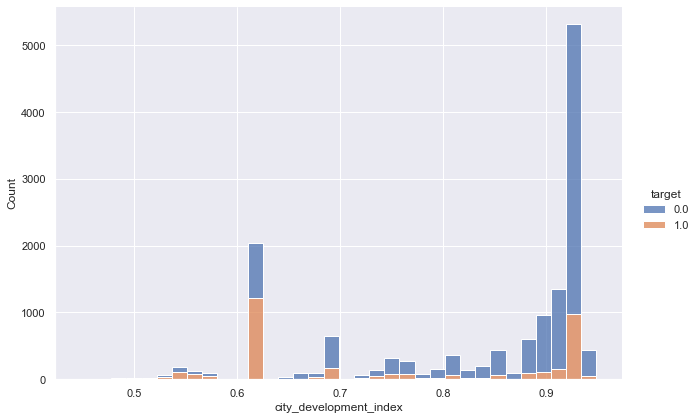

In [36]:
sns.displot(x_target, x = x_target.city_development_index, hue = x_target.target, multiple = "stack",height=6, aspect=1.5)

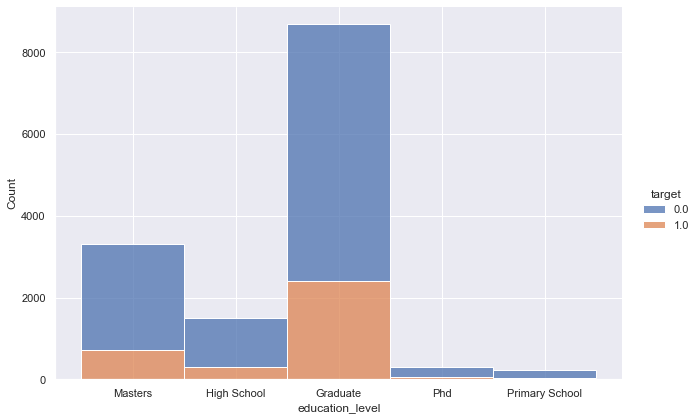

In [37]:
sns.displot(x_target, x = x_target.education_level, hue = x_target.target, multiple = "stack",height=6, aspect=1.5)

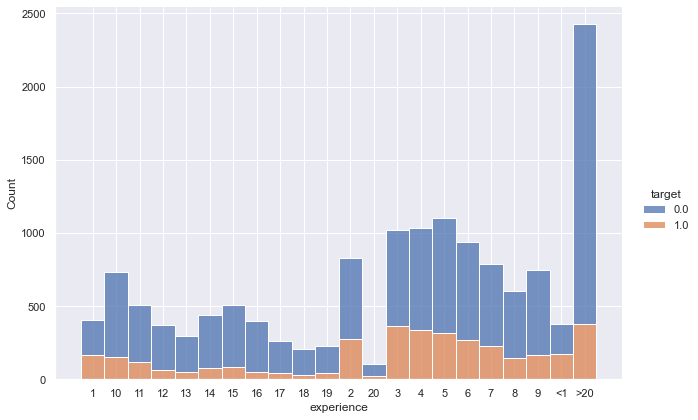

In [38]:
x_target = x_target.sort_values(by = 'experience')
sns.displot(x_target, x = x_target.experience, hue = x_target.target, multiple = "stack",height=6, aspect=1.5)

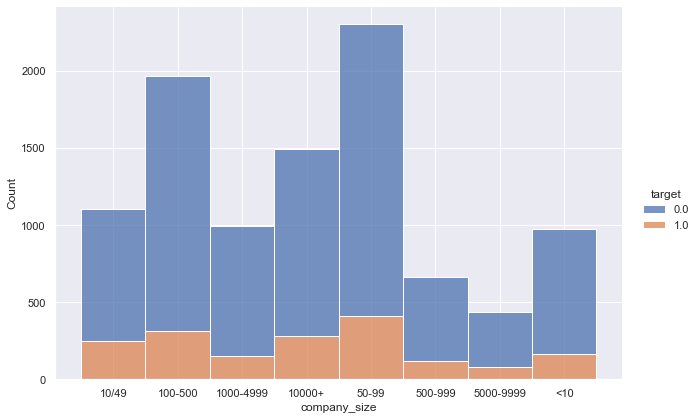

In [39]:
x_target = x_target.sort_values(by = 'company_size')
sns.displot(x_target, x = x_target.company_size, hue = x_target.target, multiple = "stack",height=6, aspect=1.5)

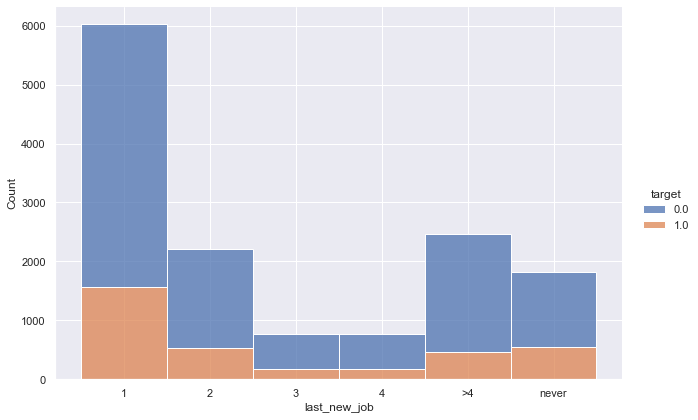

In [40]:
x_target = x_target.sort_values(by = 'last_new_job')
sns.displot(x_target, x = x_target.last_new_job, hue = x_target.target, multiple = "stack", height=6, aspect=1.5)

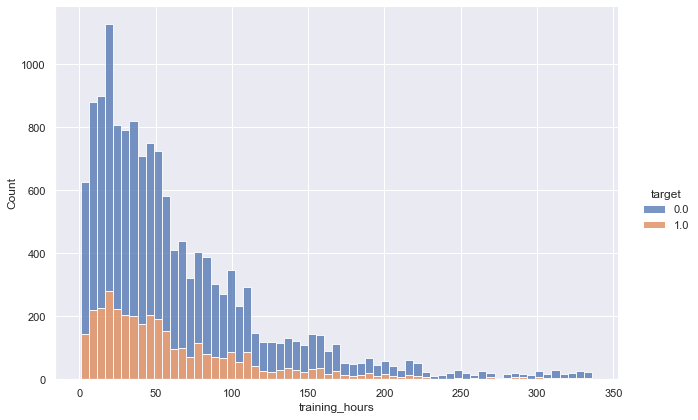

In [41]:
sns.displot(x_target, x = x_target.training_hours, hue = x_target.target, multiple = "stack",height=6, aspect=1.5)

In [42]:
pd.crosstab(x_target.gender, x_target.target)

target,0.0,1.0
gender,,
Female,684,230
Male,7644,2270
Other,107,40


In [43]:
pd.crosstab(x_target.relevent_experience, x_target.target)

target,0.0,1.0
relevent_experience,,
Has relevent experience,8169,2216
No relevent experience,2636,1347


In [44]:
pd.crosstab(x_target.enrolled_university, x_target.target)

target,0.0,1.0
enrolled_university,,
Full time course,1739,1071
Part time course,670,230
no_enrollment,8195,2171


In [45]:
pd.crosstab(x_target.major_discipline, x_target.target)

target,0.0,1.0
major_discipline,,
Arts,155,40
Business Degree,162,64
Humanities,385,108
No Major,128,44
Other,201,67
STEM,8093,2832


In [46]:
pd.crosstab(x_target.company_type, x_target.target)

target,0.0,1.0
company_type,,
Early Stage Startup,321,107
Funded Startup,659,113
NGO,309,71
Other,64,18
Public Sector,547,151
Pvt Ltd,6075,1335


# 6. Handle missing values: Use any three methods to handle missing values. 
(6 points)

In [47]:
x_target.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [48]:
X_test.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                    1115
relevent_experience          0
enrolled_university         94
education_level            122
major_discipline           724
experience                  20
company_size              1508
company_type              1542
last_new_job                96
training_hours               0
dtype: int64

In [49]:
xPreprocessed = x_target.copy()
xDropped = x_target.copy()

In [50]:
xDropped = xDropped.dropna()

In [51]:
# We find many missing values from company size so why not remove it as a whole?

# xDropped = xDropped.drop('company_size',axis = 1)

In [52]:
# xDropped contains all rows without any missing values
xDropped

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6248,12491,city_71,0.884,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,1,72,0.0
13175,11217,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,104,0.0
323,10811,city_159,0.843,Female,Has relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,1,246,0.0
4397,13305,city_36,0.893,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,172,0.0
9399,3315,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Early Stage Startup,1,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,11414,city_78,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,never,31,0.0
13557,1938,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,never,50,1.0
11612,10280,city_90,0.698,Male,No relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,never,131,0.0
6409,1692,city_104,0.924,Male,Has relevent experience,no_enrollment,Masters,STEM,10,10000+,Pvt Ltd,never,95,0.0


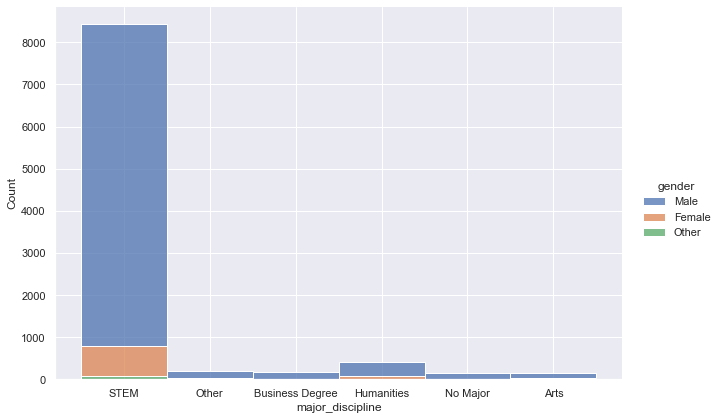

In [53]:
# The following plots should help demonstrate that the following actions taken to address missing data. It 
# should not greatly bias the dataset as a whole.

sns.displot(xPreprocessed, x = 'major_discipline', hue = 'gender', multiple = "stack", height=6, aspect=1.5)

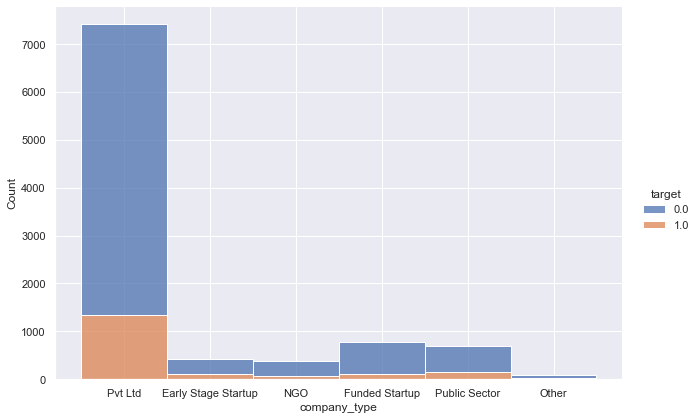

In [54]:
sns.displot(xPreprocessed, x = 'company_type', hue = 'target', multiple = "stack", height=6, aspect=1.5)

In [55]:
# Since the data is very imbalanced it should be safe to fill missing values with Male as the majority 
# of respondents are male.
    
xPreprocessed['gender'] = xPreprocessed['gender'].fillna('Male')
X_test['gender'] = X_test['gender'].fillna('Male')
xPreprocessed.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [56]:
xPreprocessed['major_discipline'] = xPreprocessed['major_discipline'].fillna('STEM') # Most are STEM
X_test['major_discipline'] = X_test['major_discipline'].fillna('STEM')
xPreprocessed.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline             0
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [57]:
xPreprocessed['company_type'] = xPreprocessed['company_type'].fillna('Pvt Ltd') # Most are Pvt Ltd
xPreprocessed['major_discipline'] = xPreprocessed['major_discipline'].fillna('STEM')

X_test['company_type'] = X_test['company_type'].fillna('Pvt Ltd') 
X_test['major_discipline'] = X_test['major_discipline'].fillna('STEM')

xPreprocessed.isnull().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline             0
experience                  45
company_size              4430
company_type                 0
last_new_job               327
training_hours               0
target                       0
dtype: int64

In [58]:
xPreprocessed = xPreprocessed.replace('', np.nan)
X_test = X_test.replace('', np.nan)

xPreprocessed = xPreprocessed.drop("company_size", axis = 1)
X_test = X_test.drop('company_size', axis = 1)

xPreprocessed = xPreprocessed.dropna(axis = 0)
xPreprocessed.isnull().sum()

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [59]:
X_test.isnull().sum()

index                       0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university        94
education_level           122
major_discipline            0
experience                 20
company_type                0
last_new_job               96
training_hours              0
dtype: int64

In [60]:
cols = ["last_new_job", "experience", "education_level", "enrolled_university"]

X_test = X_test.fillna(X_test.mode().iloc[0])

In [61]:
X_test.isnull().sum()

index                     0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [62]:
print("Original Shape: " + str(x_target.shape))
print("Preprocessed Shape: " + str(xPreprocessed.shape))
print("Dropped Shape: " + str(xDropped.shape))

Original Shape: (14368, 14)
Preprocessed Shape: (13511, 13)
Dropped Shape: (6705, 14)


# 7. Create new features using combinations / transformations of existing features (Optional) 
(0 points)

In [63]:
# experience x last job might display people who dont want a new one

# 8. Scale the features for models that require scaling and perform required pre-processing
(such as one hot encoding etc.) 
(5 points)

In [64]:
xPreprocessed

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
6248,12491,city_71,0.884,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Pvt Ltd,1,72,0.0
13175,11217,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,Pvt Ltd,1,104,0.0
14350,11152,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,STEM,2,Pvt Ltd,1,37,0.0
6778,7902,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,2,Pvt Ltd,1,50,1.0
323,10811,city_159,0.843,Female,Has relevent experience,no_enrollment,Masters,STEM,8,Pvt Ltd,1,246,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,19068,city_114,0.926,Male,No relevent experience,Full time course,High School,STEM,4,Pvt Ltd,never,60,0.0
8655,19144,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,4,Pvt Ltd,never,48,1.0
12813,15016,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,STEM,7,Pvt Ltd,never,11,0.0
1361,13674,city_21,0.624,Male,No relevent experience,Full time course,High School,STEM,7,Pvt Ltd,never,94,0.0


In [65]:
scaled = StandardScaler()

cols = ['city_development_index', 'training_hours']
X_test[cols] = scaled.fit_transform(X_test[cols])
xPreprocessed[cols] = scaled.fit_transform(xPreprocessed[cols])

In [66]:
encode = LabelEncoder()

cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline',
        'experience', 'company_type', 'last_new_job']
        #'company_size'
    
X_test['city'] = encode.fit_transform(X_test['city'])
X_test['gender'] = encode.fit_transform(X_test['gender'])
X_test['relevent_experience'] = encode.fit_transform(X_test['relevent_experience'])
X_test['enrolled_university'] = encode.fit_transform(X_test['enrolled_university'])
X_test['education_level'] = encode.fit_transform(X_test['education_level'])
X_test['major_discipline'] = encode.fit_transform(X_test['major_discipline'])
X_test['experience'] = encode.fit_transform(X_test['experience'])
#X_test['company_size'] = encode.fit_transform(X_test['company_size'])
X_test['company_type'] = encode.fit_transform(X_test['company_type'])
X_test['last_new_job'] = encode.fit_transform(X_test['last_new_job'])

xPreprocessed['city'] = encode.fit_transform(xPreprocessed['city'])
xPreprocessed['gender'] = encode.fit_transform(xPreprocessed['gender'])
xPreprocessed['relevent_experience'] = encode.fit_transform(xPreprocessed['relevent_experience'])
xPreprocessed['enrolled_university'] = encode.fit_transform(xPreprocessed['enrolled_university'])
xPreprocessed['education_level'] = encode.fit_transform(xPreprocessed['education_level'])
xPreprocessed['major_discipline'] = encode.fit_transform(xPreprocessed['major_discipline'])
xPreprocessed['experience'] = encode.fit_transform(xPreprocessed['experience'])
#xPreprocessed['company_size'] = encode.fit_transform(xPreprocessed['company_size'])
xPreprocessed['company_type'] = encode.fit_transform(xPreprocessed['company_type'])
xPreprocessed['last_new_job'] = encode.fit_transform(xPreprocessed['last_new_job'])

In [67]:
#scale = MinMaxScaler()

#xPreprocessed[['city_development_index', 'training_hours']] = scale.fit_transform(xPreprocessed[['city_development_index', 'training_hours']])

In [68]:
xPreprocessed

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
6248,12491,99,0.433659,1,0,2,2,5,2,5,0,0.109568,0.0
13175,11217,5,0.728059,1,0,2,0,5,17,5,0,0.639733,0.0
14350,11152,48,0.646281,1,0,2,1,5,11,5,0,-0.470301,0.0
6778,7902,5,0.728059,1,1,0,0,5,11,5,0,-0.254921,1.0
323,10811,47,0.098369,0,0,2,2,5,18,5,0,2.992342,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,19068,13,0.777126,1,1,0,1,5,14,5,5,-0.089244,0.0
8655,19144,64,-1.692568,1,1,0,0,5,14,5,5,-0.288056,1.0
12813,15016,5,0.728059,1,1,2,4,5,17,5,5,-0.901060,0.0
1361,13674,64,-1.692568,1,1,0,1,5,17,5,5,0.474056,0.0


In [69]:
newPre = xPreprocessed.copy()

newPre = newPre.drop("gender", axis = 1)
newPre = newPre.drop("city", axis = 1)
newPre = newPre.drop("relevent_experience", axis = 1)
newPre = newPre.drop("major_discipline", axis = 1)
newPre = newPre.drop("experience", axis = 1)
newPre = newPre.drop("company_type", axis = 1)
newPre = newPre.drop("training_hours", axis = 1)
newPre = newPre.drop("last_new_job", axis = 1)

X_test = X_test.drop("gender", axis = 1)
X_test = X_test.drop("city", axis = 1)
X_test = X_test.drop("relevent_experience", axis = 1)
X_test = X_test.drop("major_discipline", axis = 1)
X_test = X_test.drop("experience", axis = 1)
X_test = X_test.drop("company_type", axis = 1)
X_test = X_test.drop("training_hours", axis = 1)
X_test = X_test.drop("last_new_job", axis = 1)

In [70]:
newPre

,index,city_development_index,enrolled_university,education_level,target
6248,12491,0.433659,2,2,0.0
13175,11217,0.728059,2,0,0.0
14350,11152,0.646281,2,1,0.0
6778,7902,0.728059,0,0,1.0
323,10811,0.098369,2,2,0.0
...,...,...,...,...,...
10360,19068,0.777126,0,1,0.0
8655,19144,-1.692568,0,0,1.0
12813,15016,0.728059,2,4,0.0
1361,13674,-1.692568,0,1,0.0


In [71]:
X_test

,index,city_development_index,enrolled_university,education_level
0,16834,0.758006,2,4
1,15437,0.774244,2,2
2,8549,0.749888,0,1
3,7222,0.725531,2,4
4,17054,0.725531,2,0
...,...,...,...,...
4785,5915,-1.677618,0,0
4786,11083,0.725531,2,0
4787,2335,0.725531,2,0
4788,7691,-1.677618,0,2


# 9. Explain the following terms in detail 
(9 points)

In [72]:
# a. Pearson’s correlation (3 points)
# b. T – test (3 points)
# c. Chi squared test (3 points)

In [73]:
# a. Pearson’s correlation (3 points)

# Pearson's correlation is a way of visualizing the correlation between two feature attributes. This 
# calculation is done through a linear function and displays the ratio of the covariance between any two 
# attributes. These relationships are displayed using values from -1 to 1, where -1 means the relationship 
# is perfectly inverted (negative), while 1 means the relationship is perfectly aligned (positive).
# Interestingly, 0 indicates that the two attributes contain no relationships between them. This demonstrates
# that we would rather be in one of the extremes, -1 or 1, as opposed to being near zero as this will directly
# influence the models ability to accurate identify the target variable.

In [74]:
# b. T – test (3 points)

# A T-test is a statistical way to compare the averages of any two attributes. It provides us with a means of
# understanding if those two attributes are different from one another, and gives us the ability to discern 
# just how different they are. A T-test uses statistics such as a t-distribution to test for statistical 
# significance. It takes a sample observation from each attribute and assumes the null hypothesis to be the
# averages are equal. We can then test weather we can reject or accept it.

In [75]:
# c. Chi squared test (3 points)

# A chi squared test is a statistical test for deetermining the difference between the expected and observed 
# output in our data. It also gives us the ability to estimate our confidence levels that our null hypothesis 
# is true. In this way we can use the chi squared test as a measurement for creating the best fit line.
# In essence we can use the observed input and compare it to the expected values with some degrees of freedom
# in order to calculate chi-square. 

# 10. Perform Pearson correlation between continuous features and plot the heatmap of the correlation matrix. 
(3 points)

In [76]:
# Preprocessed

print("Pearson Correlation: " + str(xPreprocessed.corr(method = 'pearson')))

Pearson Correlation:                            index      city  city_development_index    gender  \
index                   1.000000 -0.004290               -0.002279 -0.005793   
city                   -0.004290  1.000000               -0.322421  0.023129   
city_development_index -0.002279 -0.322421                1.000000 -0.012208   
gender                 -0.005793  0.023129               -0.012208  1.000000   
relevent_experience    -0.005258  0.011431               -0.059506  0.007359   
enrolled_university    -0.002505 -0.077903                0.173230 -0.030094   
education_level        -0.001463  0.005677                0.070162 -0.006584   
major_discipline        0.003349  0.109878               -0.112564  0.055152   
experience             -0.004469 -0.033550                0.025692  0.006104   
company_type           -0.002711  0.001479               -0.008263  0.033580   
last_new_job           -0.009447 -0.008071                0.013435  0.029808   
training_hours     

In [77]:
# Dropped

print("Pearson Correlation: " + str(xDropped.corr(method = 'pearson')))

Pearson Correlation:                            index  city_development_index  training_hours  \
index                   1.000000               -0.017411        0.008346   
city_development_index -0.017411                1.000000       -0.009071   
training_hours          0.008346               -0.009071        1.000000   
target                  0.006802               -0.424551       -0.009312   

                          target  
index                   0.006802  
city_development_index -0.424551  
training_hours         -0.009312  
target                  1.000000  


In [78]:
xDropped

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6248,12491,city_71,0.884,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,1,72,0.0
13175,11217,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,104,0.0
323,10811,city_159,0.843,Female,Has relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,1,246,0.0
4397,13305,city_36,0.893,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,172,0.0
9399,3315,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Early Stage Startup,1,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,11414,city_78,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,never,31,0.0
13557,1938,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,never,50,1.0
11612,10280,city_90,0.698,Male,No relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,never,131,0.0
6409,1692,city_104,0.924,Male,Has relevent experience,no_enrollment,Masters,STEM,10,10000+,Pvt Ltd,never,95,0.0


In [79]:
discrete = xPreprocessed.copy()
continuous = xPreprocessed.copy()

dropColsCont = [0,2,11] 
dropColsDisc = [0,1,3,4,5,6,7,8,9,10]

In [80]:
xPreprocessed

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
6248,12491,99,0.433659,1,0,2,2,5,2,5,0,0.109568,0.0
13175,11217,5,0.728059,1,0,2,0,5,17,5,0,0.639733,0.0
14350,11152,48,0.646281,1,0,2,1,5,11,5,0,-0.470301,0.0
6778,7902,5,0.728059,1,1,0,0,5,11,5,0,-0.254921,1.0
323,10811,47,0.098369,0,0,2,2,5,18,5,0,2.992342,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,19068,13,0.777126,1,1,0,1,5,14,5,5,-0.089244,0.0
8655,19144,64,-1.692568,1,1,0,0,5,14,5,5,-0.288056,1.0
12813,15016,5,0.728059,1,1,2,4,5,17,5,5,-0.901060,0.0
1361,13674,64,-1.692568,1,1,0,1,5,17,5,5,0.474056,0.0


In [81]:
continuous.drop(continuous.columns[dropColsDisc], inplace = True, axis = 1)
continuous

,city_development_index,training_hours,target
6248,0.433659,0.109568,0.0
13175,0.728059,0.639733,0.0
14350,0.646281,-0.470301,0.0
6778,0.728059,-0.254921,1.0
323,0.098369,2.992342,0.0
...,...,...,...
10360,0.777126,-0.089244,0.0
8655,-1.692568,-0.288056,1.0
12813,0.728059,-0.901060,0.0
1361,-1.692568,0.474056,0.0


In [82]:
discrete.drop(discrete.columns[dropColsCont], inplace = True, axis = 1)
discrete

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,target
6248,99,1,0,2,2,5,2,5,0,0.0
13175,5,1,0,2,0,5,17,5,0,0.0
14350,48,1,0,2,1,5,11,5,0,0.0
6778,5,1,1,0,0,5,11,5,0,1.0
323,47,0,0,2,2,5,18,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...
10360,13,1,1,0,1,5,14,5,5,0.0
8655,64,1,1,0,0,5,14,5,5,1.0
12813,5,1,1,2,4,5,17,5,5,0.0
1361,64,1,1,0,1,5,17,5,5,0.0


In [83]:
# Pearson 

correlation = stats.pearsonr(continuous['city_development_index'], continuous['training_hours'])
print("City Development x Training Hours Correlation: " + str(correlation))

correlation = stats.pearsonr(continuous['city_development_index'], continuous['target'])
print("City Development x Target Correlation: " + str(correlation))

correlation = stats.pearsonr(continuous['training_hours'], continuous['target'])
print("Training Hours x Target Correlation: " + str(correlation) + " [corr, p-val]")

City Development x Training Hours Correlation: (0.0033021626164451154, 0.7011278450668357)
City Development x Target Correlation: (-0.34079528872290643, 0.0)
Training Hours x Target Correlation: (-0.0213257112347178, 0.013179358882780745) [corr, p-val]


In [84]:
# Correlation between our target and data is low for training hours, while moderate for city development.
# Our p-values however and very large with the exception of city development and the target.

<AxesSubplot:>

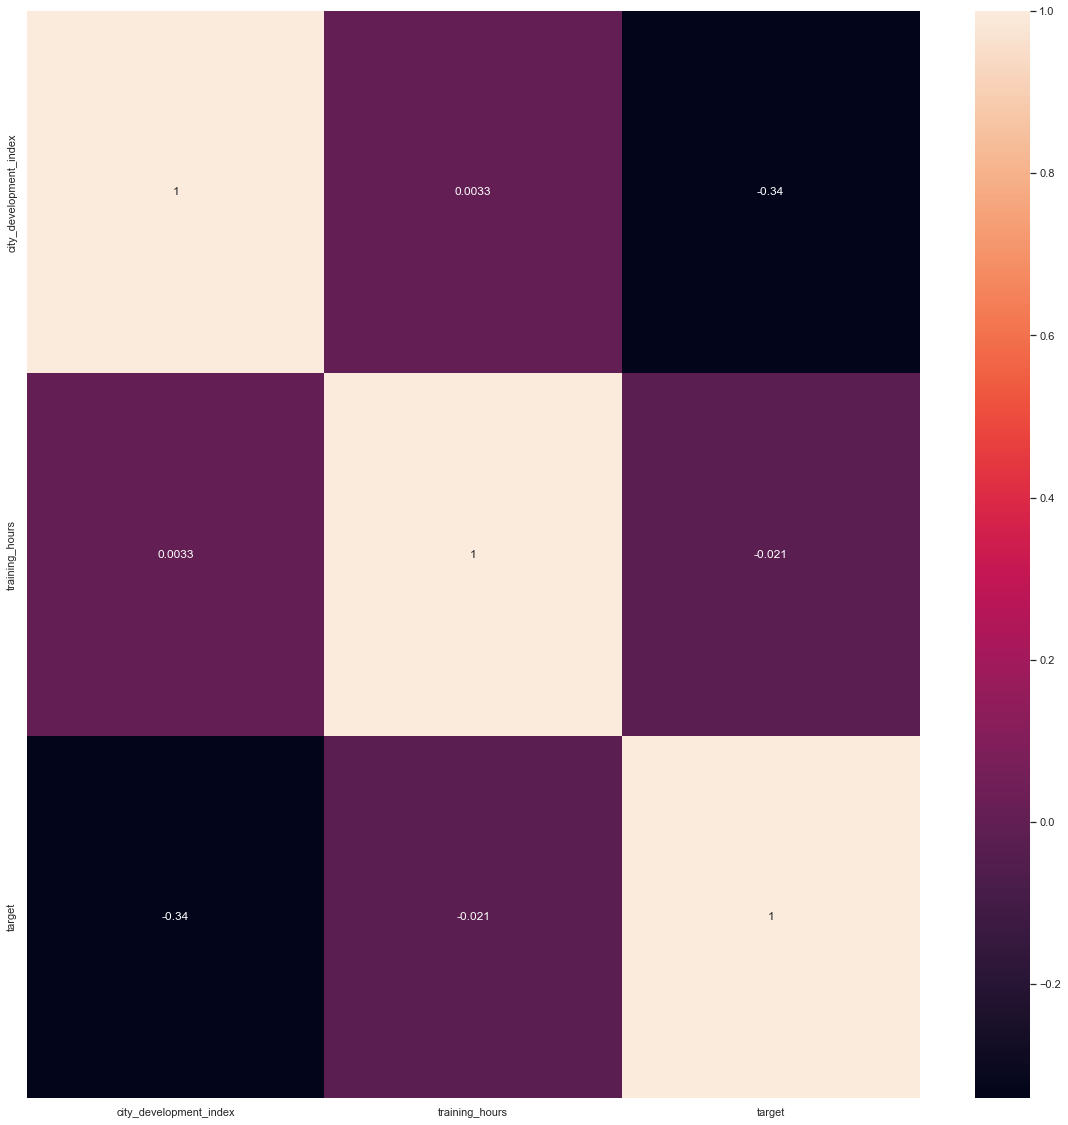

In [85]:
sns.heatmap(continuous.corr(), annot = True)

<AxesSubplot:>

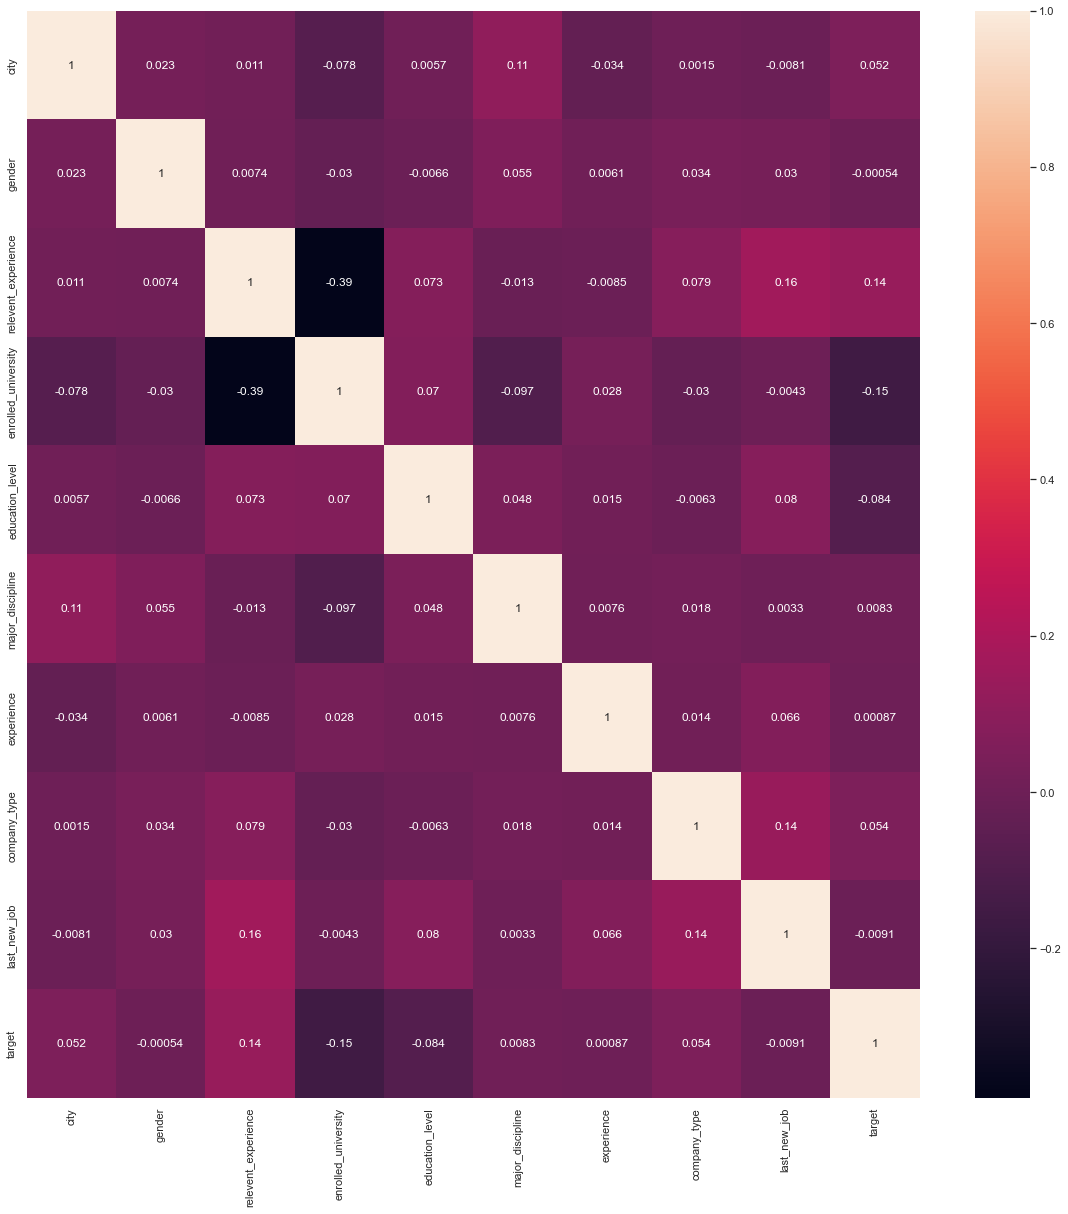

In [86]:
sns.heatmap(discrete.corr(), annot = True)

<AxesSubplot:>

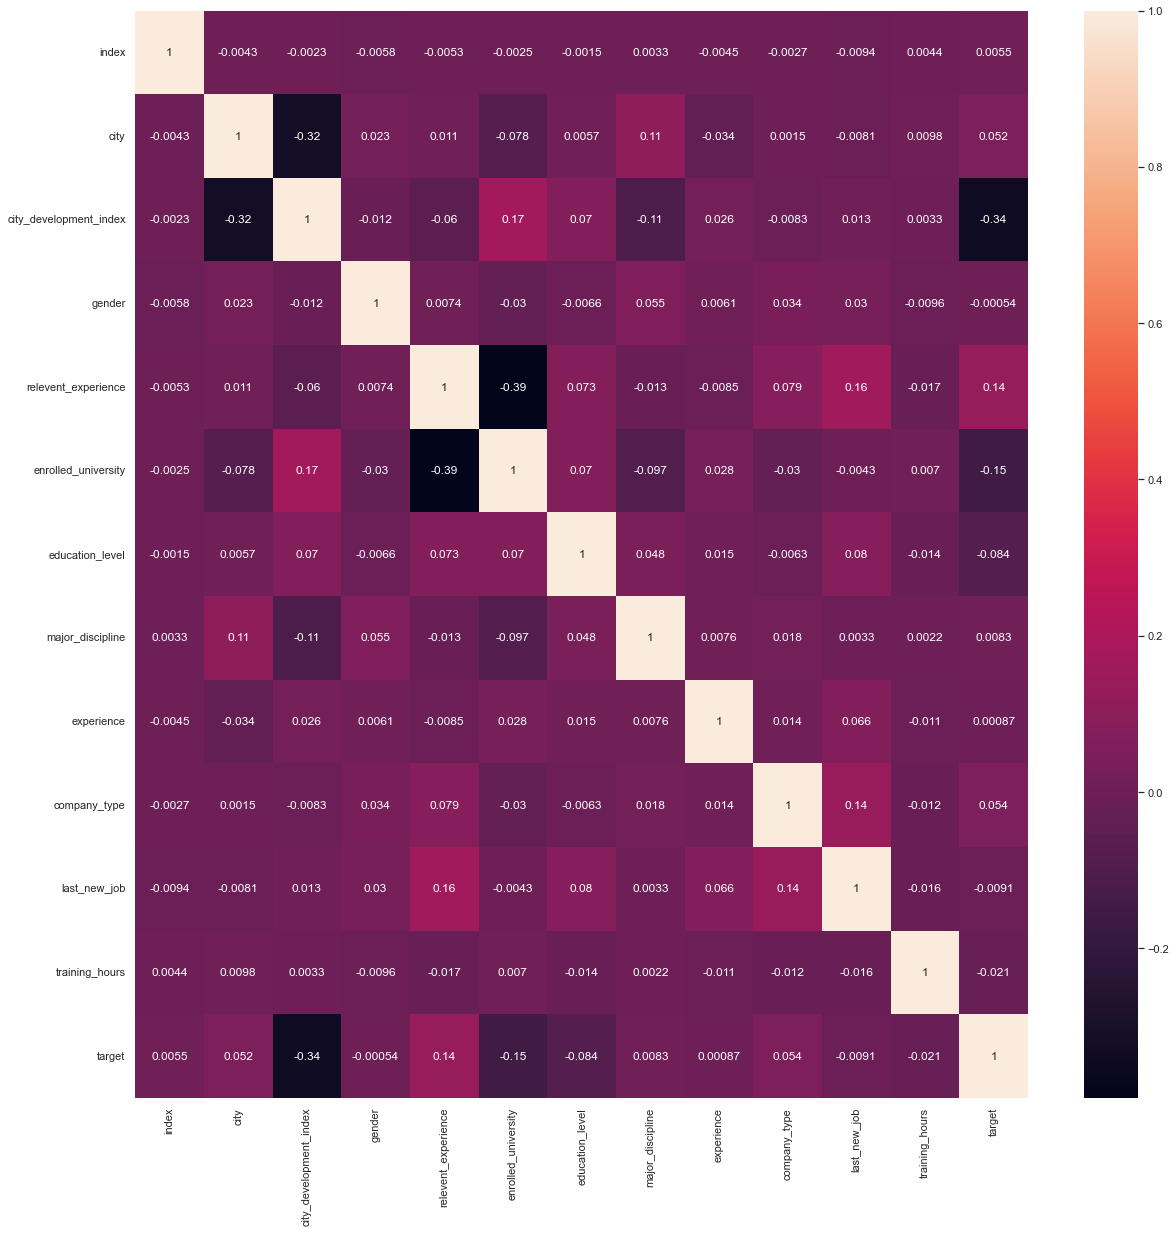

In [87]:
sns.heatmap(xPreprocessed.corr(), annot = True)

# 11. Perform t test on continuous features after dividing them using target variable. 
(3 points)

In [88]:
# Two Sample T-test

print("City Development by Target T-Test: " +
      str(stats.ttest_ind(a = continuous['city_development_index'], 
                          b = continuous['target'], equal_var = True)))

print("Training Hours by Target T-Test: " + 
      str(stats.ttest_ind(a = continuous['training_hours'], 
                          b = continuous['target'], equal_var = True)))

City Development by Target T-Test: Ttest_indResult(statistic=-26.0837580278021, pvalue=3.809674350868243e-148)
Training Hours by Target T-Test: Ttest_indResult(statistic=-26.083758027802062, pvalue=3.809674350872147e-148)


In [89]:
# Paired T-Test

print("City Development by Target T-Test: " +
      str(stats.ttest_rel(continuous['city_development_index'], 
                          continuous['target'])))

print("Training Hours by Target T-Test: " + 
      str(stats.ttest_rel(continuous['training_hours'], 
                          continuous['target'])))

City Development by Target T-Test: Ttest_relResult(statistic=-23.35613841315598, pvalue=2.597426376414187e-118)
Training Hours by Target T-Test: Ttest_relResult(statistic=-25.88432085669015, pvalue=3.1849550157474807e-144)


In [90]:
# Both of our P-Values are less than .05 so we reject the null hypothesis.

# 12. Perform Chi squared test among categorical variables and with the target variable 
(3 points)

In [91]:
# Chi-Squared Test

names = list(discrete)
names.pop()

for i in range(len(discrete.columns)-1):
    chai = pd.crosstab(discrete.columns[i], discrete.target, margins = True)
    chi = discrete[names[i]]
    targetC = discrete.target.values
    obs = np.array([targetC, chi])
    A, B = chisquare(obs)
    print(str(discrete.columns[i]) + ": \n")
    print("Observation-value: " + str(np.nanmean(A)) + " \n")
    print("P-values: " + str(np.nanmean(B)) + "\n")

city: 

Observation-value: 43.60979421902995 

P-values: 0.017419093820333915

gender: 

Observation-value: 0.7689612209936147 

P-values: 0.4785231787263484



C:\Users\GIGA\anaconda3\lib\site-packages\scipy\stats\stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


relevent_experience: 

Observation-value: 0.7840607881251105 

P-values: 0.46472993875026275

enrolled_university: 

Observation-value: 1.532760894575862 

P-values: 0.26602561292438076

education_level: 

Observation-value: 1.391540948275862 

P-values: 0.2952025886597932

major_discipline: 

Observation-value: 4.212365269461078 

P-values: 0.061960031832900164

experience: 

Observation-value: 12.513906773345354 

P-values: 0.0446380579863796

company_type: 

Observation-value: 4.049448524772217 

P-values: 0.07519922090977711

last_new_job: 

Observation-value: 2.3802477207511528 

P-values: 0.22284521356163595



# 13. Compare the features selected using visualization from question 5 and using the statistical tests from the previous three questions. 
(5 points)

In [92]:
# In question 5 it was difficult to assess which features should be selected. However, what was clear was that
# city development and relevent experience were important features. 
# 
# Using the statistical methods above we found that continuous data, such as city development, had a 
# significant impact on the target variable. This could easily be seen in our T-Test and pearson correlation. 
# While answers from our chi square test included experience, company type, and city as important variables.
# Each of these methods provides a slightly different way to arrive at similar results; However, some methods
# used provide us with different significant features.
# 
# Overall the features that statistically significant for chi square are:
#     City                     major discipline
#     Experience               company type
# 
# Overall the features that statistically significant for pearson correlation are:
#     City Development         Training Hours 
# 
# Overall the features that statistically significant for T test are:
#     City Development         Enrolled in University
# 
# Originally I believed the following would be significant after initial visualizations:
#     City Development         Relevant Experience
#     Training Hours
# 
# Each of these methods display different results that range through half the data set. This displays the
# breadth of possibilities. However, one aspect not captured is the length of the significance as "city
# development" is more important than "enrolled in university." 

# 14. Explain the following terms 
(6 points)

In [93]:
# a. Forward Selection (2 points)
# b. Backward Elimination (2 points)
# c. Recursive feature elimination (2 points)

In [94]:
# a. Forward Selection (2 points)

# Forward stepwise selection is a machine learning method where we continually add the next most significant
# variable to our machine learning model. This is done through a process where we start by adding the most
# significant variables one by one. There are many ways we can determine significance including p-values and 
# R^2. However, this process is not without its issues. We find that continually adding the most significant 
# variable does not gaurantee the model will produce better results. This may be because two variables may be 
# in the opposition of model building with eachother. This can also result in overfitting if not careful. As 
# a result there must often be a limit imposed on the feature selection.

In [95]:
# b. Backward Elimination (2 points)

# Backward stepwise elimination is very similar to forward stepwise selection except that we start our model
# with all possible variables first. Over time the model loses the least significant variable one by one.
# Significance can be determined by the p-value or by the lowest R^2 change. This will also inevitably need 
# a limit on the imposed features which are left.

In [96]:
# c. Recursive feature elimination (2 points)

# Recursive feature elimination is similar to backward stepwise elimination as it starts with a model built 
# with the complete set of features. Over time we recursively cut back the least significant features. In this
# case however we continually sample some N number of subsets. Until we find the "optimal" subset. This subset
# is then used to train the model. Interestingly, certain models such as logistic regression will not work
# due to the nature of the sampling in recusrive feature elimination.

# 15. Perform the above methods of feature reduction if you want. (Optional)

In [97]:
# DTree = DecisionTreeRegressor()
# temp = xDropped.copy()

# X_temp_train, X_temp_test, Y_temp_train, Y_temp_test = train_test_split(xDropped, xDropped.target, 
#                                                                          test_size = 0.25, random_state = 0)

In [98]:
# DTree = DecisionTreeRegressor()
# rfe = RFECV(estimator = DTree, scoring="neg_mean_squared_error", cv = 2, n_jobs = 5)
# rfe.fit(X_temp_train, Y_temp_train)
# rfe.transform(X_temp_train)
# print(rfe)
# print(rfe.n_features_)

# 16. Train at least 5 different classification models on the final data (Perform hyper parameter tuning using a validation set for each of the model). 
(10 points)

In [99]:
xPreprocessed

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
6248,12491,99,0.433659,1,0,2,2,5,2,5,0,0.109568,0.0
13175,11217,5,0.728059,1,0,2,0,5,17,5,0,0.639733,0.0
14350,11152,48,0.646281,1,0,2,1,5,11,5,0,-0.470301,0.0
6778,7902,5,0.728059,1,1,0,0,5,11,5,0,-0.254921,1.0
323,10811,47,0.098369,0,0,2,2,5,18,5,0,2.992342,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10360,19068,13,0.777126,1,1,0,1,5,14,5,5,-0.089244,0.0
8655,19144,64,-1.692568,1,1,0,0,5,14,5,5,-0.288056,1.0
12813,15016,5,0.728059,1,1,2,4,5,17,5,5,-0.901060,0.0
1361,13674,64,-1.692568,1,1,0,1,5,17,5,5,0.474056,0.0


In [100]:
xDropped

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
6248,12491,city_71,0.884,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,1,72,0.0
13175,11217,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,104,0.0
323,10811,city_159,0.843,Female,Has relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,1,246,0.0
4397,13305,city_36,0.893,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,172,0.0
9399,3315,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Early Stage Startup,1,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,11414,city_78,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,never,31,0.0
13557,1938,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,never,50,1.0
11612,10280,city_90,0.698,Male,No relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,never,131,0.0
6409,1692,city_104,0.924,Male,Has relevent experience,no_enrollment,Masters,STEM,10,10000+,Pvt Ltd,never,95,0.0


In [101]:
# Dropping all non-continuous data

def dataBuildContinuous(Data):
    independent = Data.copy()
    independent.drop(independent.columns.difference(['index','target']), 1, inplace=True)
    dependent = Data.drop('target', axis = 1)
#    dependent = dependent.drop(['city', 'gender', 'relevent_experience', 'enrolled_university', 
#                                'last_new_job', 'major_discipline', 'experience', 'company_size', 
#                                'company_type', 'education_level'], axis = 1)
    return independent, dependent

In [102]:
# Dropping all continuous data

def dataBuildDiscrete(Data):
    independent = Data.drop('city', axis = 1) # Fix this if I use it
    dependent = Data.drop('target', axis = 1)
#    dependent = dependent.drop(['city_development_index', 'training_hours'], axis = 1)
    return independent, dependent

In [103]:
# Building continuous dataset to split

# independent, dependent = dataBuildContinuous(xDropped)

In [104]:
# Building continuous dataset to split

independent, dependent = dataBuildContinuous(newPre)

C:\Users\GIGA\AppData\Local\Temp/ipykernel_20732/2478593352.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  independent.drop(independent.columns.difference(['index','target']), 1, inplace=True)


In [105]:
# Building discrete dataset to split

# DiscIndependent, DiscDependent = dataBuildDiscrete(xDropped)

In [106]:
# Building discrete dataset to split

# DiscIndependent, DiscDependent = dataBuildDiscrete(newPre)

In [107]:
independent

,index,target
6248,12491,0.0
13175,11217,0.0
14350,11152,0.0
6778,7902,1.0
323,10811,0.0
...,...,...
10360,19068,0.0
8655,19144,1.0
12813,15016,0.0
1361,13674,0.0


In [108]:
independent.drop("index", axis = 1)

,target
6248,0.0
13175,0.0
14350,0.0
6778,1.0
323,0.0
...,...
10360,0.0
8655,1.0
12813,0.0
1361,0.0


In [109]:
dependent

,index,city_development_index,enrolled_university,education_level
6248,12491,0.433659,2,2
13175,11217,0.728059,2,0
14350,11152,0.646281,2,1
6778,7902,0.728059,0,0
323,10811,0.098369,2,2
...,...,...,...,...
10360,19068,0.777126,0,1
8655,19144,-1.692568,0,0
12813,15016,0.728059,2,4
1361,13674,-1.692568,0,1


In [110]:
# Resplitting the Data into training and test sets.

XX_train, XX_test, yy_train, yy_test = train_test_split(dependent, independent, 
                                                        test_size = 0.3, random_state = 0)

x_valid, x_valid_test, y_valid, y_valid_test = train_test_split(XX_test, 
                                                                yy_test, test_size = 0.3, random_state = 0)
#
# XXD_train, XXD_test, yyD_train, yyD_test = train_test_split(DiscDependent, DiscIndependent, 
#                                                        test_size = 0.25, random_state = 0)


In [111]:
sm = SMOTE(sampling_strategy = 'auto', k_neighbors = 2, random_state = 0)
XX_res, yy_res = sm.fit_resample(XX_train, yy_train["target"])

In [112]:
print("X_train dimensions: " + str(X_train.shape))
print("X_test dimensions: " + str(X_test.shape))
print("Y_train dimensions: " + str(Y_train.shape))
print("X_train_SMOTE dimensions: " + str(XX_res.shape))
print("Y_train_SMOTE dimensions: " + str(yy_res.shape))
print("Validation Set Train dimensions: " + str(x_valid.shape))
print("Validation Set Test dimensions: " + str(x_valid_test.shape))

X_train dimensions: (14368, 13)
X_test dimensions: (4790, 4)
Y_train dimensions: (14368, 2)
X_train_SMOTE dimensions: (14322, 4)
Y_train_SMOTE dimensions: (14322,)
Validation Set Train dimensions: (2837, 4)
Validation Set Test dimensions: (1217, 4)


In [113]:
# Number of runs for each attempt algorithm, tuning to find best fit parameters

iterations = 15

# K-Nearest Neighbors Algorithm

In [114]:
def modelKNN(data1, data2, k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(data1, data2)
    return model

In [115]:
# SMOTE Continuous Data

for i in range(iterations):
    KNNmodel = modelKNN(XX_res, yy_res, i + 1)
    y_pred = KNNmodel.predict(XX_test)
    print("Accuracy Score for K-Nearest Neighbors: " + str(accuracy_score(yy_test["target"], y_pred)) 
          + "\tNeighbors: " + str(i + 1))

Accuracy Score for K-Nearest Neighbors: 0.6068080907745437	Neighbors: 1
Accuracy Score for K-Nearest Neighbors: 0.6702022693635915	Neighbors: 2
Accuracy Score for K-Nearest Neighbors: 0.5784410458806117	Neighbors: 3
Accuracy Score for K-Nearest Neighbors: 0.6334484459792797	Neighbors: 4
Accuracy Score for K-Nearest Neighbors: 0.57498766650222	Neighbors: 5
Accuracy Score for K-Nearest Neighbors: 0.6127281697089294	Neighbors: 6
Accuracy Score for K-Nearest Neighbors: 0.5587074494326592	Neighbors: 7
Accuracy Score for K-Nearest Neighbors: 0.5952146028613715	Neighbors: 8
Accuracy Score for K-Nearest Neighbors: 0.5513073507646769	Neighbors: 9
Accuracy Score for K-Nearest Neighbors: 0.5816477553034041	Neighbors: 10
Accuracy Score for K-Nearest Neighbors: 0.5431672422298964	Neighbors: 11
Accuracy Score for K-Nearest Neighbors: 0.5747409965466206	Neighbors: 12
Accuracy Score for K-Nearest Neighbors: 0.5330537740503206	Neighbors: 13
Accuracy Score for K-Nearest Neighbors: 0.5631475086334484	Nei

In [116]:
# Not SMOTE Continuous

for i in range(iterations):
    KNNmodel = modelKNN(XX_train, yy_train["target"], i + 1)
    y_pred = KNNmodel.predict(XX_test)
    print("Accuracy Score for K-Nearest Neighbors: " + str(accuracy_score(yy_test["target"], y_pred)) + "\tNeighbors: " 
          + str(i + 1))
    
    
y_pred = KNNmodel.predict(x_valid_test)
print("\nValidation Accuracy: " + str(accuracy_score(y_valid_test["target"], y_pred)) 
          + "\tNeighbors: " + str(i + 1))

Accuracy Score for K-Nearest Neighbors: 0.6563887518500247	Neighbors: 1
Accuracy Score for K-Nearest Neighbors: 0.7372964972866305	Neighbors: 2
Accuracy Score for K-Nearest Neighbors: 0.6896891958559448	Neighbors: 3
Accuracy Score for K-Nearest Neighbors: 0.7298963986186483	Neighbors: 4
Accuracy Score for K-Nearest Neighbors: 0.7076961026147015	Neighbors: 5
Accuracy Score for K-Nearest Neighbors: 0.735816477553034	Neighbors: 6
Accuracy Score for K-Nearest Neighbors: 0.7150962012826838	Neighbors: 7
Accuracy Score for K-Nearest Neighbors: 0.7382831771090281	Neighbors: 8
Accuracy Score for K-Nearest Neighbors: 0.7259496793290577	Neighbors: 9
Accuracy Score for K-Nearest Neighbors: 0.740009866798224	Neighbors: 10
Accuracy Score for K-Nearest Neighbors: 0.7340897878638382	Neighbors: 11
Accuracy Score for K-Nearest Neighbors: 0.743709916132215	Neighbors: 12
Accuracy Score for K-Nearest Neighbors: 0.7372964972866305	Neighbors: 13
Accuracy Score for K-Nearest Neighbors: 0.746669955599408	Neigh

# Artifical Neural Network Algorithm

In [117]:
# Gridsearch is applicable here but tedious to implement and document given training time would increase since
# epochs would be tested too.

def modelANN():
    model = Sequential()
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(.2))
    model.add(Dense(25, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 
    return model

In [118]:
ANNmodel = modelANN()

In [119]:
# SMOTE Continuous Data

modelHistory = ANNmodel.fit(XX_res, yy_res, epochs = iterations)
y_pred = ANNmodel.predict(XX_test)

Epoch 1/15

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

448/448 [==============================] - 0s 733us/step - loss: 196.4559 - accuracy: 0.4702
Epoch 2/15
448/448 [==============================] - 0s 739us/step - loss: 6.8555 - accuracy: 0.4995
Epoch 3/15
448/448 [==============================] - 0s 728us/step - loss: 2.4749 - accuracy: 0.5083
Epoch 4/15
448/448 [==============================] - 0s 723us/step - loss: 1.9155 - accuracy: 0.4951
Epoch 5/15
448/448 [==============================] - 0s 722us/step - loss: 1.7158 - accuracy: 0.4

In [120]:
# Not SMOTE Continuous

modelHistory = ANNmodel.fit(XX_train, yy_train["target"], epochs = iterations)
y_pred = ANNmodel.predict(XX_test)

y_pred = KNNmodel.predict(x_valid_test)
print("\nValidation Accuracy: " + str(accuracy_score(y_valid_test["target"], y_pred)))

Epoch 1/15
296/296 [==============================] - 0s 769us/step - loss: 0.7147 - accuracy: 0.7072
Epoch 2/15
296/296 [==============================] - 0s 735us/step - loss: 0.8079 - accuracy: 0.6926
Epoch 3/15
296/296 [==============================] - 0s 733us/step - loss: 0.6855 - accuracy: 0.7141
Epoch 4/15
296/296 [==============================] - 0s 736us/step - loss: 0.6868 - accuracy: 0.7182
Epoch 5/15
296/296 [==============================] - 0s 730us/step - loss: 0.7283 - accuracy: 0.7046
Epoch 6/15
296/296 [==============================] - 0s 736us/step - loss: 0.6761 - accuracy: 0.7175
Epoch 7/15
296/296 [==============================] - 0s 770us/step - loss: 0.6934 - accuracy: 0.7180
Epoch 8/15
296/296 [==============================] - 0s 731us/step - loss: 0.6589 - accuracy: 0.7181
Epoch 9/15
296/296 [==============================] - 0s 743us/step - loss: 0.6358 - accuracy: 0.7245
Epoch 10/15
296/296 [==============================] - 0s 745us/step - loss: 0.622

# Random Forrest Algorithm

In [121]:
def modelRF(data1, data2, k):
    model = RandomForestClassifier(n_estimators = k)
    model.fit(data1, data2)
    return model

In [122]:
# SMOTE Continuous Data

for i in range(iterations):
    RFModel = modelRF(XX_res, yy_res, i + 1)
    print("Accuracy Score for Random Forrest: " + str(RFModel.score(XX_test, yy_test["target"])) 
          + "\tEstimators: " + str(i + 1))

Accuracy Score for Random Forrest: 0.6573754316724223	Estimators: 1
Accuracy Score for Random Forrest: 0.7126295017266897	Estimators: 2
Accuracy Score for Random Forrest: 0.6610754810064134	Estimators: 3
Accuracy Score for Random Forrest: 0.697089294523927	Estimators: 4
Accuracy Score for Random Forrest: 0.6623088307844105	Estimators: 5
Accuracy Score for Random Forrest: 0.685002466699556	Estimators: 6
Accuracy Score for Random Forrest: 0.6761223482979773	Estimators: 7
Accuracy Score for Random Forrest: 0.6882091761223483	Estimators: 8
Accuracy Score for Random Forrest: 0.6689689195855945	Estimators: 9
Accuracy Score for Random Forrest: 0.6857424765663542	Estimators: 10
Accuracy Score for Random Forrest: 0.6706956092747903	Estimators: 11
Accuracy Score for Random Forrest: 0.6825357671435619	Estimators: 12
Accuracy Score for Random Forrest: 0.6672422298963986	Estimators: 13
Accuracy Score for Random Forrest: 0.6810557474099654	Estimators: 14
Accuracy Score for Random Forrest: 0.67957572

In [123]:
# Not SMOTE Continuous

for i in range(iterations):
    RFModel = modelRF(XX_train, yy_train["target"], i + 1)
    print("Accuracy Score for Random Forrest: " + str(RFModel.score(XX_test, yy_test["target"])) 
          + "\tEstimators: " + str(i + 1))
    
print("\nValidation Accuracy: " + str(RFModel.score(x_valid_test, y_valid_test["target"])))

Accuracy Score for Random Forrest: 0.6963492846571288	Estimators: 1
Accuracy Score for Random Forrest: 0.7247163295510607	Estimators: 2
Accuracy Score for Random Forrest: 0.7017760236803158	Estimators: 3
Accuracy Score for Random Forrest: 0.7215096201282684	Estimators: 4
Accuracy Score for Random Forrest: 0.7044893931919092	Estimators: 5
Accuracy Score for Random Forrest: 0.7210162802170695	Estimators: 6
Accuracy Score for Random Forrest: 0.7123828317710903	Estimators: 7
Accuracy Score for Random Forrest: 0.7239763196842625	Estimators: 8
Accuracy Score for Random Forrest: 0.7202762703502713	Estimators: 9
Accuracy Score for Random Forrest: 0.7175629008386778	Estimators: 10
Accuracy Score for Random Forrest: 0.7111494819930932	Estimators: 11
Accuracy Score for Random Forrest: 0.7163295510606809	Estimators: 12
Accuracy Score for Random Forrest: 0.7096694622594968	Estimators: 13
Accuracy Score for Random Forrest: 0.7220029600394672	Estimators: 14
Accuracy Score for Random Forrest: 0.710902

# Decision Tree Algorithm

In [124]:
def modelDT(data1, data2, md):
    model = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = md)   
    model.fit(data1, data2)
    return model

In [125]:
# SMOTE Continuous Data

for i in range(iterations):
    DTModel = modelDT(XX_res, yy_res, i+1)
    print("Accuracy Score for Decision Tree: " + str(DTModel.score(XX_test, yy_test["target"])) 
          + "\tMax Depth: " + str(i + 1))

Accuracy Score for Decision Tree: 0.6526887025160335	Max Depth: 1
Accuracy Score for Decision Tree: 0.6171682289097188	Max Depth: 2
Accuracy Score for Decision Tree: 0.646275283670449	Max Depth: 3
Accuracy Score for Decision Tree: 0.6546620621608288	Max Depth: 4
Accuracy Score for Decision Tree: 0.6581154415392205	Max Depth: 5
Accuracy Score for Decision Tree: 0.6593487913172176	Max Depth: 6
Accuracy Score for Decision Tree: 0.6593487913172176	Max Depth: 7
Accuracy Score for Decision Tree: 0.6625555007400099	Max Depth: 8
Accuracy Score for Decision Tree: 0.6721756290083868	Max Depth: 9
Accuracy Score for Decision Tree: 0.6776023680315738	Max Depth: 10
Accuracy Score for Decision Tree: 0.6827824370991613	Max Depth: 11
Accuracy Score for Decision Tree: 0.6840157868771584	Max Depth: 12
Accuracy Score for Decision Tree: 0.6783423778983719	Max Depth: 13
Accuracy Score for Decision Tree: 0.6773556980759744	Max Depth: 14
Accuracy Score for Decision Tree: 0.6793290577207696	Max Depth: 15


In [126]:
# Not SMOTE Continuous

for i in range(iterations):
    DTModel = modelDT(XX_train, yy_train["target"], i+1)
    print("Accuracy Score for Decision Tree: " + str(DTModel.score(XX_test, yy_test["target"])) 
          + "\tMax Depth: " + str(i + 1))
    
print("\nValidation Accuracy: " + str(DTModel.score(x_valid_test, y_valid_test["target"])))

Accuracy Score for Decision Tree: 0.784163788850518	Max Depth: 1
Accuracy Score for Decision Tree: 0.784163788850518	Max Depth: 2
Accuracy Score for Decision Tree: 0.784163788850518	Max Depth: 3
Accuracy Score for Decision Tree: 0.7844104588061174	Max Depth: 4
Accuracy Score for Decision Tree: 0.7826837691169216	Max Depth: 5
Accuracy Score for Decision Tree: 0.7839171188949186	Max Depth: 6
Accuracy Score for Decision Tree: 0.7834237789837197	Max Depth: 7
Accuracy Score for Decision Tree: 0.7782437099161322	Max Depth: 8
Accuracy Score for Decision Tree: 0.7819437592501234	Max Depth: 9
Accuracy Score for Decision Tree: 0.7735569807597434	Max Depth: 10
Accuracy Score for Decision Tree: 0.7703502713369511	Max Depth: 11
Accuracy Score for Decision Tree: 0.7708436112481499	Max Depth: 12
Accuracy Score for Decision Tree: 0.7629501726689689	Max Depth: 13
Accuracy Score for Decision Tree: 0.7617168228909719	Max Depth: 14
Accuracy Score for Decision Tree: 0.7560434139121855	Max Depth: 15

Valida

# Logistic Regression Algorithm

In [127]:
# regression takes awhile so iterations were lowered to 10

In [128]:
def modelLR(data1, data2, splits):
    folds = KFold(n_splits = splits, random_state = 0, shuffle = True)
    model = LogisticRegressionCV(cv = folds, random_state = 0, max_iter = 10000) # Need to increase max_iter
    model = model.fit(data1, data2)
    return model

In [129]:
# SMOTE Continuous Data

for i in range(iterations-6):
    LRModel = modelLR(XX_res, yy_res, i+2)
    print("Best Accuracy Score for Logistic Regression: " + str(LRModel.score(XX_test, yy_test["target"]))
          + "\tSplits: " + str(i+2))

Best Accuracy Score for Logistic Regression: 0.7089294523926986	Splits: 2
Best Accuracy Score for Logistic Regression: 0.7195362604834731	Splits: 3
Best Accuracy Score for Logistic Regression: 0.7017760236803158	Splits: 4
Best Accuracy Score for Logistic Regression: 0.7035027133695116	Splits: 5
Best Accuracy Score for Logistic Regression: 0.7030093734583128	Splits: 6
Best Accuracy Score for Logistic Regression: 0.6995559940799211	Splits: 7
Best Accuracy Score for Logistic Regression: 0.7079427725703009	Splits: 8
Best Accuracy Score for Logistic Regression: 0.6988159842131229	Splits: 9
Best Accuracy Score for Logistic Regression: 0.7022693635915146	Splits: 10


In [130]:
# Not SMOTE Continuous

for i in range(iterations-6):
    LRModel = modelLR(XX_train, yy_train["target"], i+2)
    print("Best Accuracy Score for Logistic Regression: " + str(LRModel.score(XX_test, yy_test["target"])) 
          + "\tSplits: " + str(i+2))

print("\nValidation Accuracy: " + str(LRModel.score(x_valid_test, y_valid_test["target"])))    

Best Accuracy Score for Logistic Regression: 0.7646768623581648	Splits: 2
Best Accuracy Score for Logistic Regression: 0.7666502220029601	Splits: 3
Best Accuracy Score for Logistic Regression: 0.7651702022693636	Splits: 4
Best Accuracy Score for Logistic Regression: 0.7659102121361618	Splits: 5
Best Accuracy Score for Logistic Regression: 0.7661568820917612	Splits: 6
Best Accuracy Score for Logistic Regression: 0.7671435619141589	Splits: 7
Best Accuracy Score for Logistic Regression: 0.7661568820917612	Splits: 8
Best Accuracy Score for Logistic Regression: 0.765416872224963	Splits: 9
Best Accuracy Score for Logistic Regression: 0.7636901825357671	Splits: 10

Validation Accuracy: 0.7600657354149548


# 17. Write any one classification algorithm without using scikit-learn and train on the final data. 
(10 points)

In [131]:
class MyLRModel:
    def __init__(self, X, Y):
        self.data = X
        self.length = len(X)
        self.target = Y
        self.intercept = 0
        self.slope = 0
        self.y_pred = 0
    
    def deriveThis(self, length, data, target, y_pred):
        slope = sum(self.data * (self.target - self.y_pred)) * (-2/self.length)
        intercept = sum((self.target - self.y_pred)) * (-1/self.length)
        return slope, intercept
    
    def fitLR(self, epochNum, rate):
        for i in range(epochNum):
            self.y_pred = self.slope * self.data + self.intercept
            derivedSlope, derivedIntercept = self.deriveThis(self.length, self.data, self.target, self.y_pred)
            self.slope = self.slope - rate * derivedSlope
            self.intercept = self.intercept - rate * derivedIntercept
            
    def getModel(self):
        return self.slope, self.intercept
            
    def prediction(self, X):
        return self.intercept + self.slope * X

In [132]:
class MyLRModel2:
    def __init__(self):
        self.rate = .1
        self.num = 100
        self.bias = None
        self.weights = None
    
    def fit(self, X, Y):
        NNumber, NFeat = X.shape
        self.weights = np.zeros(NFeat)
        self.bias = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.num):
            ypred = self.prediction(self.X)
            derivedW = - ((2*(self.X.T).dot(self.Y - ypred))/NNumber)
            derivedb = - (2*np.sum(self.Y - ypred)/NNumber)
            self.weights = self.weights - self.rate * derivedW
            self.bias = self.bias - self.rate * derivedb
            
    def prediction(self, X):
        return np.dot(X, self.weights) + self.bias

In [133]:
#XX_train, XX_test, yy_train, yy_test
#temp_train = X_test.copy()
#temp_train = temp_train.drop("index", axis = 1)

tempX_train = XX_train.copy()
tempX_train = tempX_train.drop("index", axis = 1)

tempY_train = yy_train.copy()
tempY_train = tempY_train.drop("index", axis = 1)

In [134]:
indexHolder = X_test.copy()
indexHolder = indexHolder.drop("city_development_index", axis = 1)
indexHolder = indexHolder.drop("enrolled_university", axis = 1)
indexHolder = indexHolder.drop("education_level", axis = 1)

X_test = X_test.drop("index", axis = 1)

In [135]:
indexHolder

,index
0,16834
1,15437
2,8549
3,7222
4,17054
...,...
4785,5915
4786,11083
4787,2335
4788,7691


In [136]:
X_test

,city_development_index,enrolled_university,education_level
0,0.758006,2,4
1,0.774244,2,2
2,0.749888,0,1
3,0.725531,2,4
4,0.725531,2,0
...,...,...,...
4785,-1.677618,0,0
4786,0.725531,2,0
4787,0.725531,2,0
4788,-1.677618,0,2


In [137]:
tempY_train

,target
6362,0.0
6689,0.0
8606,1.0
4533,0.0
8330,1.0
...,...
13630,0.0
10346,0.0
4507,1.0
4050,1.0


In [138]:
tempX_train

,city_development_index,enrolled_university,education_level
6362,0.777126,2,1
6689,-0.220565,2,0
8606,0.728059,0,1
4533,0.433659,2,0
8330,-0.220565,0,1
...,...,...,...
13630,0.728059,2,0
10346,-1.087411,2,0
4507,-1.692568,2,0
4050,-1.692568,2,2


In [139]:
tempY_train

,target
6362,0.0
6689,0.0
8606,1.0
4533,0.0
8330,1.0
...,...
13630,0.0
10346,0.0
4507,1.0
4050,1.0


In [140]:
modelLRR = MyLRModel2()
modelLRR.fit(tempX_train, tempY_train["target"])
pred = modelLRR.prediction(X_test)

In [141]:
pred

array([0.02962261, 0.08010269, 0.19912099, ..., 0.13958212, 0.50910629,
       0.17972174])

In [142]:
XXXData = X_test

In [143]:
XXXData['target'] = pred
XXXData['city_development_index'] = indexHolder["index"]

In [144]:
XXXData.rename(columns = {'city_development_index':'index'}, inplace = True)
XXXData = XXXData.drop("enrolled_university", axis = 1)
XXXData = XXXData.drop("education_level", axis = 1)

In [145]:
# Important, before submission I had to manually remove a column and move the remaining columns one space over
# this was done because I could not figure out how to remove the implicit indexing from to_csv().

XXXData.to_csv('submission.csv')

In [146]:
y = newPre['target']
x = newPre[['city_development_index', 'enrolled_university', 'education_level']]
x = smS.add_constant(x)
model = smS.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     664.5
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:37:54   Log-Likelihood:                -6827.1
No. Observations:               13511   AIC:                         1.366e+04
Df Residuals:                   13507   BIC:                         1.369e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\GIGA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [147]:
curXT = np.array(XX_test.iloc[:,1])
curYT = np.array(yy_test.iloc[:,1])
curX = np.array(XX_train.iloc[:,1])
curY = np.array(yy_train.iloc[:,1])

print(curX)
print(curY)

[ 0.77712607 -0.22056504  0.7280593  ... -1.69256833 -1.69256833
  0.19650256]
[0. 0. 1. ... 1. 1. 0.]


In [148]:
len(curY)

9457

In [149]:
def rmseD(curY, curX, rmse, slop, inter):
    for i in range(len(curY)):
        modelPrediction =  inter + slop * curX[i]
        rmse += (curY[i] - modelPrediction) ** 2
        rmse = np.sqrt(rmse/len(curY))
    return rmse

In [150]:
#epochRMSE = []
#rmse = 0

lr = MyLRModel(curX, curY)
slop, inter = lr.getModel()
lr.fitLR(199, .01)

#for i in range(200):

    #rmseA = rmseD(curY, curX, rmse, slop, inter)
    #epochRMSE.append(rmseA)

#print(str(np.min(epochRMSE)) + " " + str(epochRMSE.index(np.max(epochRMSE))))
model_pred = lr.prediction(curXT)
model_pred

array([0.13762825, 0.4530907 , 0.10596473, ..., 0.10596473, 0.4530907 ,
       0.31705485])

In [151]:
#0.0014503304785782728 114
#0.0014503304717616403 199
#0.00010580087868034131 199

<function matplotlib.pyplot.show(close=None, block=None)>

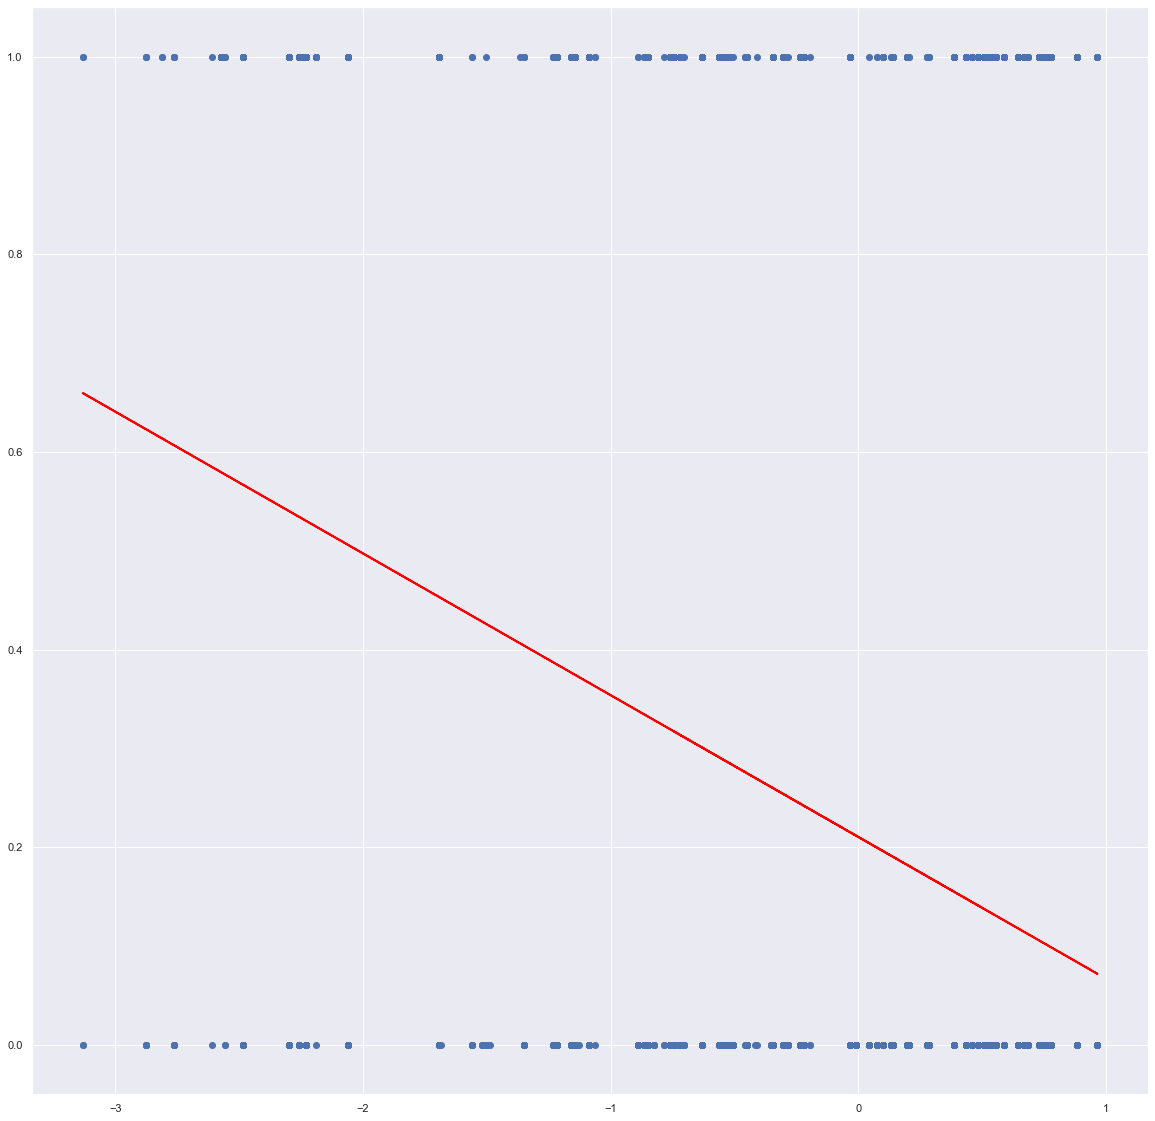

In [152]:
pyplt.scatter(curX, curY)
pyplt.plot(curXT, model_pred , color = 'red', lw = 2)
pyplt.show

In [153]:
finalData = yy_test

In [154]:
finalData

,index,target
3567,13822,0.0
947,14433,1.0
1164,17290,0.0
2213,12620,0.0
13060,13833,0.0
...,...,...
9571,17048,0.0
7046,15691,0.0
9528,11357,1.0
7905,4635,1.0


In [155]:
finalData['target'] = model_pred

In [156]:
finalData

,index,target
3567,13822,0.137628
947,14433,0.453091
1164,17290,0.105965
2213,12620,0.105965
13060,13833,0.105965
...,...,...
9571,17048,0.101274
7046,15691,0.098928
9528,11357,0.105965
7905,4635,0.453091


In [157]:
finalData.to_csv('Alt_Model.csv') # We do not use this model in the end, this is an alternative model created
# using a different LR model.

# 18. Submit the test predictions using your model from question 14 to the Kaggle competition.

(Note: Actual ranking would be based on a private leader board data (40% of the test
data), the live ranking is given only using the public leader board data (60% of the test
data)) (9 points)

In [158]:
# IMPORTANT
# 
# This became incredibly time consuming to run and I struggled with many flaws in my linear regression. As a
# result of this struggle I copied this lab file, removed most of the code and focused on only building the
# model from the data. I submitted the results of that file to kaggle and then copied the code into this one
# for submission. I mention this incase there are any discrepencies between what was submitted and what this
# file outputs. Furthermore, the other file, which produced the submitted results, can also be submitted if 
# needed. However, since the code is exactly the same between files I dont think this will be an issue.

# 19. Create a detailed report of the lab. 
(10 points)

In [159]:
# See Attached PDF

# 20. Give your comments on how you found the lab tasks.
(0 points)

In [160]:
# This lab was difficult and confusing to work with. I spent ~30 hours on this lab. It was not 
# conceptually difficult, but the vagueness caused me a lot of headaches. I often found myself needing to fix
# previous sections as a result of changing requirements of the data from section to section. Finally, I 
# severly struggled to implement linear regression as I needed to recode it twice because I could not figure
# out why my first implementation was not working.